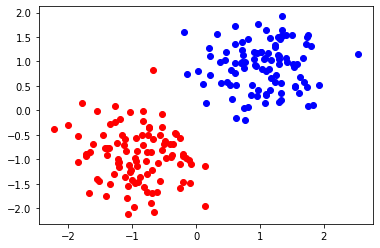

In [403]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
mA = np.array([1, 1])
mB = np.array([-1, -1])
sigmaA = 0.5
sigmaB = 0.5
classA = np.zeros([n,2])
classB = np.zeros([n,2])
classA[:,0] = np.random.normal(mA[0], sigmaA, n)
classA[:,1] = np.random.normal(mA[1], sigmaA, n)
classB[:,0] = np.random.normal(mB[0], sigmaB, n)
classB[:,1] = np.random.normal(mB[1], sigmaB, n)

plt.plot(classA[:,0], classA[:,1], 'bo', color = 'b')
plt.plot(classB[:,0], classB[:,1], 'bo', color = 'r')

data = np.concatenate((classA, classB), axis=0)
labels_delta = np.array([1]*n + [-1]*n)

data_labels = np.concatenate((data, labels_delta.reshape(n*2,1)), axis=1)
np.random.shuffle(data_labels)

X = data_labels[:,:2].T
X_bias = np.ones([X.shape[0] + 1, X.shape[1]])
X_bias[:-1,:] = np.copy(X)

T_delta = data_labels[:,2].reshape(n*2, 1).T
T_percept = np.copy(T_delta)
for i, t in enumerate(T_percept[0,:]):
    if t == -1:
        T_percept[0,i] = 0

W = np.random.rand(T_percept.shape[0],X.shape[0])
W_bias = np.random.rand(T_percept.shape[0],X.shape[0] + 1)

def indicator(W, x):
    if np.matmul(W,x) >= 0:
        return 1
    else:
        return 0

def w_line_vec(W, x_start, x_end, bias = False):
    w_line = np.zeros(2)
    k = W[:,1][0]/W[:,0][0]
    if bias == True:
        m = W[:,2]
    else:
        m = 0
    w_line[0] = k*x_start + m
    w_line[1] = k*x_end + m
    
    return w_line

def norm_vec(w_line):
    normal = np.zeros(w_line.shape)
    normal[0] = 0
    normal[1] = -1/w_line[1]
    return normal
    

In [404]:
def perceptron_learning(lr, epoch, W, X, T, classA, classB, bias = False):    
    for e in range(epoch):
        delta_W = np.zeros(W.shape)
        for i in range(X.shape[1]):
            x = X[:,i].reshape(X.shape[0], 1)
            y = indicator(W,x)
            t = T_percept[:,i]
            if t == 0 and y == 1:
                delta_W += -lr*x.T
            if t == 1 and y == 0:
                delta_W += lr*x.T
        W = np.add(W, delta_W) # Batch learning

    plt.plot(classA[:,0], classA[:,1], 'bo', color = 'b')
    plt.plot(classB[:,0], classB[:,1], 'bo', color = 'r')
    if bias == True:
        #plt.plot(norm_vec(W_bias)[:2] + W[0,2])
        plt.plot(w_line(W_bias, 0, 1, bias = True))
        plt.plot(norm_vec(w_line(W_bias, 0, 1, bias = True)))
    else:
        #plt.plot(norm_vec(W))
        plt.plot(w_line_vec(W, 0, 1))
        plt.plot(norm_vec(w_line_vec(W, 0, 1)))
    
    return W

### Without bias

In [405]:
W_old = W

In [406]:
norm_vec(w_line_vec(W, 0, 1))[1]*w_line_vec(W, 0, 1)[1]

-1.0

In [501]:
np.matmul(np.array(1, w_line_vec(W, 0, 1)[1]).T,
       np.array(1, norm_vec(w_line_vec(W, 0, 1))[1]))

ValueError: matmul: Input operand 0 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

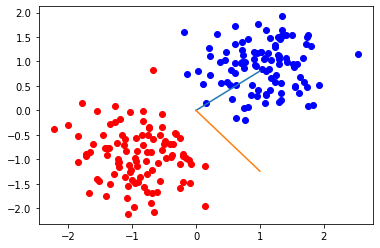

In [500]:
W_new = perceptron_learning(0.001, 5, W_old, X, T_percept, classA, classB)
W_old = W_new

### With bias

In [223]:
W_old = W_bias

In [224]:
W_bias.shape

(1, 3)

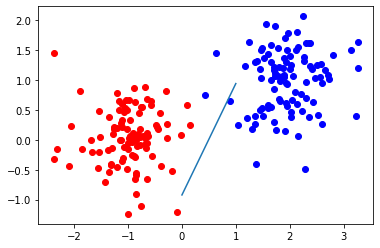

In [339]:
W_new = perceptron_learning(0.001, 5, W_old, X_bias, T_percept, classA, classB, True)
W_old = W_new